In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
folder = '/gdrive/MyDrive/learn_deep_learning/'

In [ ]:
!ls '/gdrive/MyDrive/learn_deep_learning/'

 01_artificial_neuron.ipynb   NLP.ipynb      Tensorflow.ipynb
 CNN.ipynb		      RNNs.ipynb     training.1600000.processed.noemoticon.csv
 data			     'Smart trash'   Untitled4.ipynb


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(folder + 'training.1600000.processed.noemoticon.csv', encoding='latin', header=None)

In [ ]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df = df.iloc[:, [0, 5]]

In [ ]:
df.head()

,0,5
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.columns = ['sentiment', 'tweet']

In [ ]:
df.columns

Index(['sentiment', 'tweet'], dtype='object')

In [ ]:
df.head()

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df['sentiment'].value_counts()
# 0 ==> Sentiment négatif
# 4 ==> Sentiment positif

sentiment
0    800000
4    800000
Name: count, dtype: int64

In [ ]:
sents = {0:"negatif", 4:"positif"}

In [ ]:
sents[0]

'negatif'

In [ ]:
def change_label(label):
  return sents[label]

In [ ]:
df['sentiment'] = df['sentiment'].replace(sents)

In [ ]:
df.head()

,sentiment,tweet
0,negatif,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,negatif,is upset that he can't update his Facebook by ...
2,negatif,@Kenichan I dived many times for the ball. Man...
3,negatif,my whole body feels itchy and like its on fire
4,negatif,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.sample(10) # Donner 5 tweets aléatoirement

,sentiment,tweet
343869,negatif,if i didnt have sooo much work to do... i coul...
717330,negatif,@Jonasbrothers Does it count if you wish you w...
276338,negatif,@portialake OMG!!! that's terrible!
290606,negatif,Hmm....this chicken polenta lasagna gave me a ...
787632,negatif,"awwww, i just cried for that little girl on gr..."
1177526,positif,@blathering cool! now just need to get them to...
1034120,positif,@heidi920 great so glad u Rt my update and the...
1328716,positif,"off to Shenandoah, Iowa for a day of walking a..."
144932,negatif,Working on my day off ... yay.
999422,positif,"@stupidgirl_no1 Zoo, yes! I need to visit my p..."


# Data Preprocessing

In [ ]:
import re

In [ ]:
text_cleaning_regex = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]+"

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
english_stopwords = stopwords.words('english')

In [ ]:
english_stopwords

## La stemmatisation ou la rationnalisation

In [ ]:
# L'objectif de la stemmatisation est de ne conserver que le radical des mots, pour regrouper sous le même radical tous les mots d'une famille.
# Réduire le vocabulaire pour l'entrainemment rapide

In [ ]:
from nltk.stem import SnowballStemmer

In [ ]:
stemmer = SnowballStemmer('english')

In [ ]:
stemmer.stem('cats')

'cat'

In [ ]:
def preprocess(text):
  # Eliminer les mentions, les liens et tout ce qui n'est pas alphanumérique
  text = re.sub(text_cleaning_regex, " ", str(text).lower().strip())

  # Eliminer les stops words & Stem
  tokens = []
  for word in text.split(" "):
    if word not in english_stopwords:
      word_stem = stemmer.stem(word)
      tokens.append(word_stem)

  clean_text = " ".join(tokens).strip()
  return clean_text

In [ ]:
# Avant la stemmatisation
# preprocess("@lina_louati Hello, I just want to say that I'm happyyyyyyy to start learning deep learning from a good source as Udemy platform https://www.udemy.com/course/deep-learning-de-zero-a-la-certification-tensorflow/learn/lecture/38967980#overview !!")
# "hello want say happyyyyyyy start learning deep learning good source udemy platform"

'hello want say happyyyyyyy start learning deep learning good source udemy platform'

In [ ]:
# Aprés la stemmatisation
preprocess("@lina_louati Hello, I just want to say that I'm happyyyyyyy to start learning deep learning from a good source as Udemy platform https://www.udemy.com/course/deep-learning-de-zero-a-la-certification-tensorflow/learn/lecture/38967980#overview !!")

'hello want say happyyyyyyi start learn deep learn good sourc udemi platform'

In [ ]:
df['text'] = df['tweet'].apply(preprocess)

In [ ]:
df.head()

,sentiment,tweet,text
0,negatif,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww bummer shoulda got david carr third day
1,negatif,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,negatif,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save 50 rest go bound
3,negatif,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,negatif,"@nationwideclass no, it's not behaving at all....",behav mad see


# Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data = train_test_split(df, test_size=0.2, stratify=df['sentiment'], random_state=42)
# stratify=y ensures that the train and test sets have the same class distribution as the original dataset.

In [ ]:
train_data

,sentiment,tweet,text
1036873,positif,@paisleypaisley LOL why do i get ideas so far ...,lol get idea far advanc even june yet need thi...
287781,negatif,worst headache ever,worst headach ever
333391,negatif,@ewaniesciuszko i am so sad i wont see you! I...,sad wont see miss alreadi yeah perfect come ba...
1484559,positif,doesn't know how to spell conked,know spell conk
562778,negatif,&quot;So we stand here now and no one knows us...,quot stand one know us get use get use gone qu...
...,...,...,...
1592199,positif,new blog this morning www.thepinkneedle.com,new blog morn www thepinkneedl com
880070,positif,OMG! @ItsChelseaStaub you do a amazing job in ...,omg itschelseastaub amaz job j n
1093760,positif,Its 3 am and I just got home from meeting and ...,3 got home meet talk endless one coolest guy e...
502113,negatif,Just bought 2 chocolate bars with &quot;1 in 5...,bought 2 chocol bar quot 1 5 6 win free bar qu...


In [ ]:
len(train_data)

1280000

In [ ]:
test_data

,sentiment,tweet,text
291262,negatif,@30STM_Denalie yes! black and red are my fav c...,yes black red fav color realli want color def ...
1359075,positif,qu buy OPEN HOUSE THIS WEEKEND 11AM-4PM. Best ...,qu buy open hous weekend 11am 4pm best valu on...
1009651,positif,"@GinoandFran Fran, can you greet me on air??? ...",fran greet air okay hahahaha thank
1538714,positif,"@mangelanchez OMG, thats awesome! Goood luck! ...",omg that awesom goood luck u meet caaut calgar...
1046690,positif,@Sumana_Raja hahahhaha! That is a very good po...,hahahhaha good point
...,...,...,...
203556,negatif,Beautiful not shit weather! So happy to see it...,beauti shit weather happi see mod practic toda...
163122,negatif,@gedhead if only @stephenfry wouldn't have som...,stephenfri fiftythousand follow hugh lauri nee...
1176116,positif,"@LA__Brat following you in here also, i hope y...",follow also hope atleast get also wish get wel...
477177,negatif,I feel like we haven't had a decent swell sinc...,feel like decent swell sinc last fall hope wav...


In [ ]:
len(test_data)

320000

In [ ]:
# Check stratify option

In [ ]:
train_data['sentiment'].value_counts()

sentiment
positif    640000
negatif    640000
Name: count, dtype: int64

In [ ]:
test_data['sentiment'].value_counts()

sentiment
negatif    160000
positif    160000
Name: count, dtype: int64

In [ ]:
def length(text):
  return len(text.split(" "))

In [ ]:
df['len'] = df['text'].apply(length)

In [ ]:
df['len'].min(), df['len'].max(), df['len'].mean(), df['len'].median()

(1, 50, 7.22946, 7.0)

<ipython-input-81-d458ee0973ec>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['len'])


<Axes: xlabel='len', ylabel='Density'>

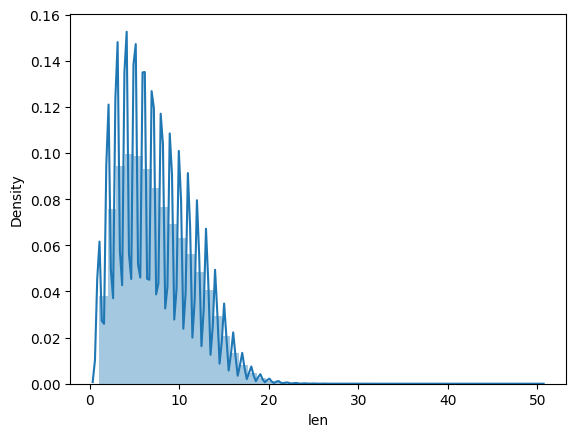

In [ ]:
import seaborn as sns
sns.distplot(df['len'])

# Tokenization et text to sequences

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(train_data['text'])

In [ ]:
word_index = tokenizer.word_index
len(word_index)

248676

In [ ]:
vocab_size = 70000

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size ,oov_token="<OOV>")
tokenizer.fit_on_texts(train_data['text'])
word_index = tokenizer.word_index

maxlen = 15
training_sequences = tokenizer.texts_to_sequences(train_data['text'])
training_padded = pad_sequences(training_sequences, padding="post", maxlen=maxlen, truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_data['text'])
test_padded = pad_sequences(test_sequences, padding="post", maxlen=maxlen, truncating="post")

# Label encoder

In [ ]:
train_data['sentiment']

1036873    positif
287781     negatif
333391     negatif
1484559    positif
562778     negatif
            ...   
1592199    positif
880070     positif
1093760    positif
502113     negatif
1421597    positif
Name: sentiment, Length: 1280000, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
training_labels = encoder.fit_transform(train_data['sentiment'])

In [ ]:
training_labels

array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
test_labels = encoder.transform(test_data['sentiment'])
test_labels

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
training_labels.shape

(1280000,)

In [ ]:
training_labels = training_labels.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

In [ ]:
training_labels.shape, test_labels.shape

((1280000, 1), (320000, 1))

# Entrainement du modéle

In [ ]:
import tensorflow as tf

In [ ]:
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.keras",
                                               monitor="val_accuracy",
                                               mod="max",
                                               save_best_only=True)

In [ ]:
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True)

In [ ]:
import numpy as np

In [ ]:
np.power(vocab_size, 1/4)

16.26576561697786

In [ ]:
embedding_dim = 16
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(8, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
        ]
)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

h = model.fit(training_padded, training_labels, epochs=50, batch_size = 1024,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp, stop])

Epoch 1/50
1250/1250 [==============================] - 24s 18ms/step - loss: 0.5218 - accuracy: 0.7543 - val_loss: 0.4792 - val_accuracy: 0.7735
Epoch 2/50
1250/1250 [==============================] - 24s 19ms/step - loss: 0.4662 - accuracy: 0.7802 - val_loss: 0.4712 - val_accuracy: 0.7755
Epoch 3/50
1250/1250 [==============================] - 26s 21ms/step - loss: 0.4547 - accuracy: 0.7857 - val_loss: 0.4694 - val_accuracy: 0.7760
Epoch 4/50
1250/1250 [==============================] - 22s 18ms/step - loss: 0.4470 - accuracy: 0.7896 - val_loss: 0.4704 - val_accuracy: 0.7755
Epoch 5/50
1250/1250 [==============================] - 23s 18ms/step - loss: 0.4407 - accuracy: 0.7926 - val_loss: 0.4715 - val_accuracy: 0.7755


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.xlabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

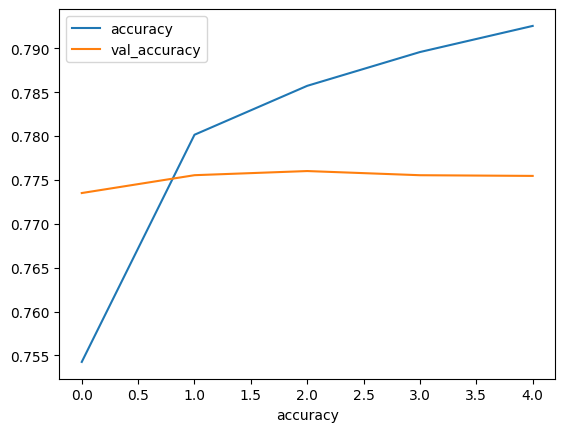

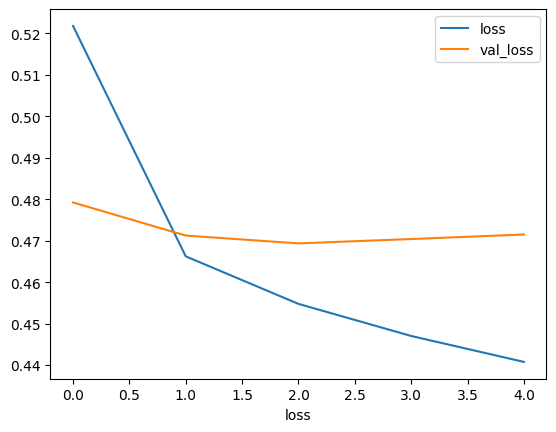

In [ ]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

# Reccurent Neural network

In [ ]:
"J'étais content, maintenant je suis énervé" # negatif
"J'étais énervé, maintenant je suis content" # Positif
# Or ces 2 classes ont le meme embedding, car elle sont constituer de exactement les memes mots

"J'étais énervé, maintenant je suis content"

In [ ]:
embedding_dim = 16
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.SimpleRNN(10),
        tf.keras.layers.Dense(8, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
        ]
)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 16)          1120000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 10)                270       
                                                                 
 dense_6 (Dense)             (None, 8)                 88        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1120367 (4.27 MB)
Trainable params: 1120367 (4.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
h = model.fit(training_padded, training_labels, epochs=50, batch_size = 1024,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp])

Epoch 1/50
1250/1250 [==============================] - 31s 25ms/step - loss: 0.4502 - accuracy: 0.7870 - val_loss: 0.4687 - val_accuracy: 0.7773
Epoch 2/50
1250/1250 [==============================] - 34s 27ms/step - loss: 0.4308 - accuracy: 0.7968 - val_loss: 0.4733 - val_accuracy: 0.7759
Epoch 3/50
1250/1250 [==============================] - 31s 25ms/step - loss: 0.4137 - accuracy: 0.8060 - val_loss: 0.4903 - val_accuracy: 0.7727
Epoch 4/50
1250/1250 [==============================] - 37s 30ms/step - loss: 0.4002 - accuracy: 0.8130 - val_loss: 0.5031 - val_accuracy: 0.7707
Epoch 5/50
1250/1250 [==============================] - 33s 26ms/step - loss: 0.3885 - accuracy: 0.8188 - val_loss: 0.5107 - val_accuracy: 0.7679
Epoch 6/50
1250/1250 [==============================] - 34s 27ms/step - loss: 0.3790 - accuracy: 0.8237 - val_loss: 0.5220 - val_accuracy: 0.7664
Epoch 7/50
1250/1250 [==============================] - 31s 25ms/step - loss: 0.3704 - accuracy: 0.8279 - val_loss: 0.5376 -

In [ ]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

# Les Modèles de type LSTM - Intuition


In [ ]:
"Je vis en France, J'ai vécu dans différentes villes jusque-là, sauf la capital <à prédire> "

In [ ]:
# Le probléme avec les RNNs, est que pour arriver à prédire la capitale, le mot
# France aura un impacte et un poid trés faible pour la prédiction

In [ ]:
# Solution : LSTM (Long Short-Term Memory) = Longue mémoire récente

In [ ]:
# Particuliarité d'LSTM
"Je vis en <à prédire> , J'ai vécu dans différentes villes jusque-là, sauf la capital PARIS"
# Il faut aller jusqu'au bout de la phrase pour comprendre le contexte => critére bidirectionnel

In [ ]:
embedding_dim = 16
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.LSTM(10),
        tf.keras.layers.Dense(8, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
        ]
)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])